In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing



In [76]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap

In [77]:
reps = 1
size = 2

In [84]:
#take randomly 80% of the data for training and 20% for testing with the iris dataset
len = 0
#size of the dataset of iris csv
df = pd.read_csv('datasets/Iris_dataset.csv', delimiter=',')
tuples = [tuple(x) for x in df.values]
len = sum(1 for row in tuples)

#randomly shuffle the dataset
np.random.shuffle(tuples)
len = sum(1 for row in tuples)
print(len)

#take randomly 80% of the data for training and 20% for testing with the iris dataset
training_size = int(len*0.8)
testing_size = int(len*0.2)


#split the dataset into training and testing
train_features = tuples[:training_size]
size = sum(1 for row in train_features)
print("size of the training dataset: ", size)

# get the labels of the dataset
train_labels = []
for i in range(training_size):
    train_labels.append(train_features[i][4])
    train_features[i] = train_features[i][:4]
print("size of the training labels: ", sum(1 for row in train_labels))

test_features = tuples[training_size:]
print("size of the testing dataset: ", sum(1 for row in test_features))
test_labels = []
for i in range(testing_size):
    test_labels.append(test_features[i][4])
    test_features[i] = test_features[i][:4]

print("size of the testing labels: ", sum(1 for row in test_labels))


#convert to ndarray
train_features = np.array(train_features)
print("size of the training dataset: ", train_features.shape)

train_labels = np.array(train_labels)
print("size of the training labels: ", train_labels.shape)

test_features = np.array(test_features)
print("size of the testing dataset: ", test_features.shape)

test_labels = np.array(test_labels)
print("size of the testing labels: ", test_labels.shape)

#normalize the data
scaler = preprocessing.StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

print(train_features)




150
size of the training dataset:  120
size of the training labels:  120
size of the testing dataset:  30
size of the testing labels:  30
size of the training dataset:  (120, 4)
size of the training labels:  (120,)
size of the testing dataset:  (30, 4)
size of the testing labels:  (30,)
[[-0.52928968  1.87977218 -1.15293539 -1.03671379]
 [-0.05880996 -0.80295521  0.76158492  0.92552051]
 [ 0.76452954 -0.5793946   0.48003781  0.40225803]
 [ 1.23500926  0.09128725  0.64896608  0.40225803]
 [-0.52928968  0.7619691  -1.26555423 -1.03671379]
 [-0.05880996 -0.5793946   0.76158492  1.57959862]
 [-1.8231089  -0.13227336 -1.49079192 -1.42916065]
 [-0.76452954  2.32689341 -1.26555423 -1.42916065]
 [-1.35262919  0.31484787 -1.20924481 -1.29834503]
 [ 0.17642989 -1.92075829  0.7052755   0.40225803]
 [-0.05880996 -1.02651583  0.14218129  0.00981117]
 [ 2.05834876 -0.13227336  1.60622623  1.18715175]
 [ 0.76452954 -0.13227336  1.15575086  1.31796737]
 [-0.88214947  1.65621156 -1.26555423 -1.16752941

In [79]:
optimizer = SPSA(maxiter=200)
feature_map = ZZFeatureMap(feature_dimension=4, reps=reps)
var_form = TwoLocal(4, ['ry', 'rz'], 'cz', reps=reps)
vqc = VQC(optimizer = optimizer, feature_map = feature_map, ansatz=var_form, loss="cross_entropy")

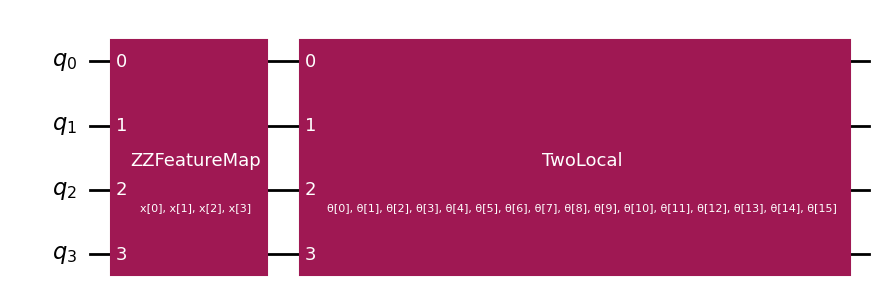

In [80]:
vqc.circuit.draw(output='mpl')

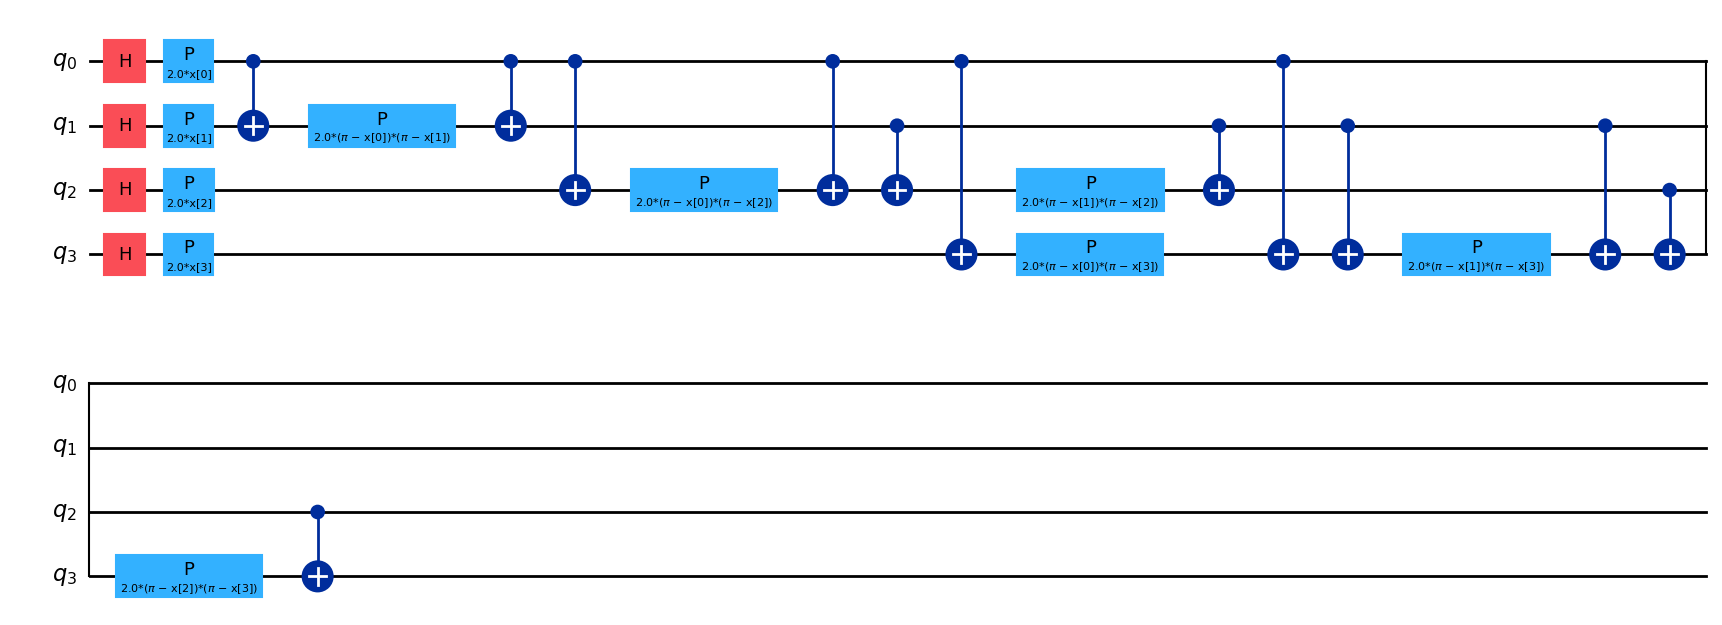

In [81]:
vqc.feature_map.decompose().draw(output='mpl')

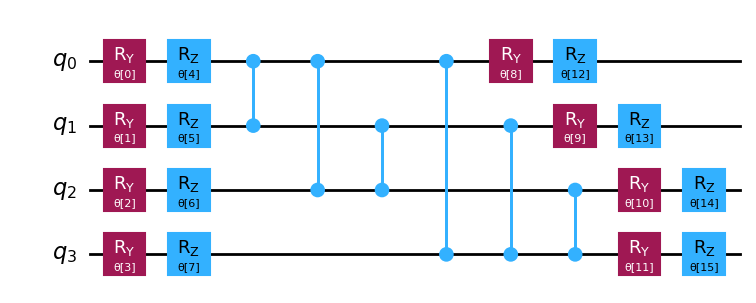

In [82]:
vqc.ansatz.decompose().draw(output='mpl')

In [83]:
vqc.fit(train_features, train_labels)

KeyboardInterrupt: 

In [ ]:
vqc.score(train_features, train_labels)

0.6083333333333333

In [ ]:
vqc.score(test_features, test_labels)

0.4666666666666667

In [ ]:
predict = vqc.predict(test_features)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {test_labels}")

Predicted labels: ['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']
Ground truth:     ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iri